# Importing Libraries and Data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import joblib
import warnings
warnings.filterwarnings('ignore')
churn = pd.read_csv("Churn_Modelling.csv")
churn = churn.dropna().drop_duplicates().drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

# Training/Testing Split

In [2]:
X = churn.loc[:, "CreditScore":"EstimatedSalary"]
y = churn["Exited"]
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20, stratify=churn['Exited'])

# Imbalanced Classes

In [3]:
ros = RandomOverSampler(random_state=20)
X_train, y_train = ros.fit_resample(X_train1, y_train1)

# Validation Folds

In [4]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

# Pre-processing

In [5]:
num_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
cat_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

In [6]:
print(preprocessor.fit_transform(X_train))

[[-0.25123176  0.26433788 -0.70239547 ...  1.          1.
   0.        ]
 [-1.24170863 -1.13540266 -1.04402094 ...  1.          1.
   0.        ]
 [-0.13890964 -0.85545455  1.00573187 ...  1.          0.
   1.        ]
 ...
 [ 0.23890112  1.01086616  1.00573187 ...  0.          1.
   0.        ]
 [ 1.48465553  1.47744634 -0.70239547 ...  1.          1.
   0.        ]
 [ 0.52481197 -0.10892627 -0.36077    ...  1.          1.
   0.        ]]


# Fitting Models

Logistic regression

knn

decision tree

random forest

xg boost


## Logistic Regression

### Specifying Model

In [7]:
log_spec = LogisticRegression(max_iter=1000, random_state=20, penalty = 'l2')

log_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', log_spec)
])

log_pipeline.fit(X_train, y_train)
y_pred_log = log_pipeline.predict(X_train)

### Confusion Matrix

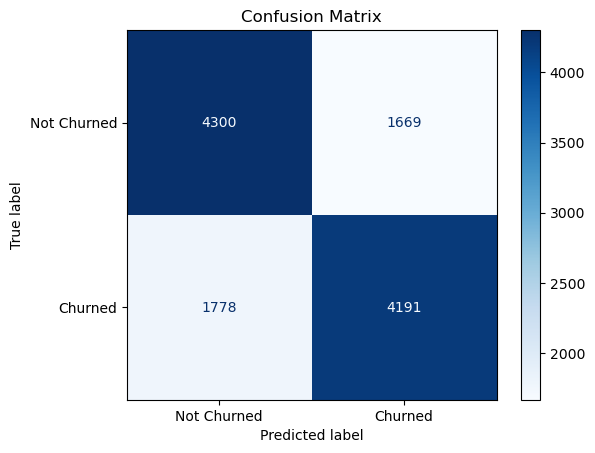

In [8]:
cm = confusion_matrix(y_train, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

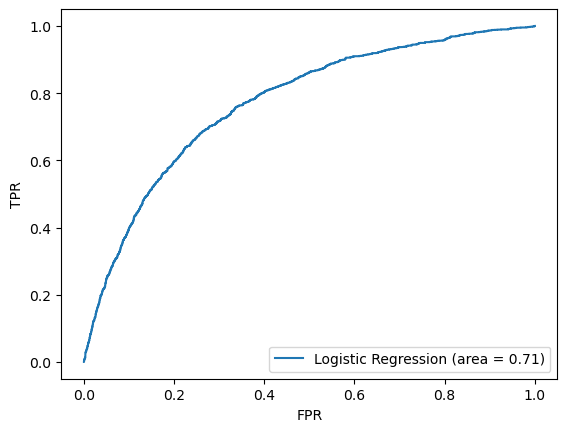

In [ ]:
logit_roc_auc = roc_auc_score(y_train, y_pred_log)
fpr, tpr, thresholds = roc_curve(y_train, log_pipeline.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## KNN

### Specifying Model

In [16]:
# knn_spec = KNeighborsClassifier()

# knn_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('knn', knn_spec)
# ])

# knn_param_grid = {
#     'knn__n_neighbors': [3, 5, 7, 9], 
#     'knn__weights': ['uniform', 'distance'],
#     'knn__metric': ['minkowski', 'euclidean']
# }

# knn_grid_search = GridSearchCV(
#     knn_pipeline,
#    knn_param_grid,
#     cv=cv,
#     n_jobs=-1,
#     scoring='roc_auc'
# )

# knn_grid_search.fit(X_train, y_train)

# best_model = knn_grid_search.best_estimator_
# joblib.dump(best_model, 'best_knn_model.pkl')
knn_best_model = joblib.load('best_knn_model.pkl')
y_pred_knn = knn_best_model.predict(X_train)

### Confusion Matrix

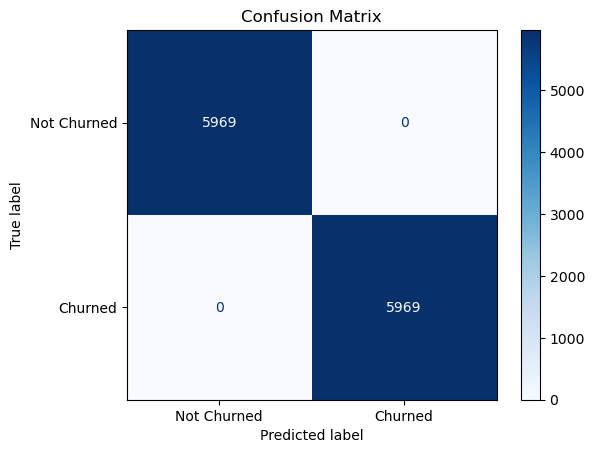

In [18]:
cm = confusion_matrix(y_train, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

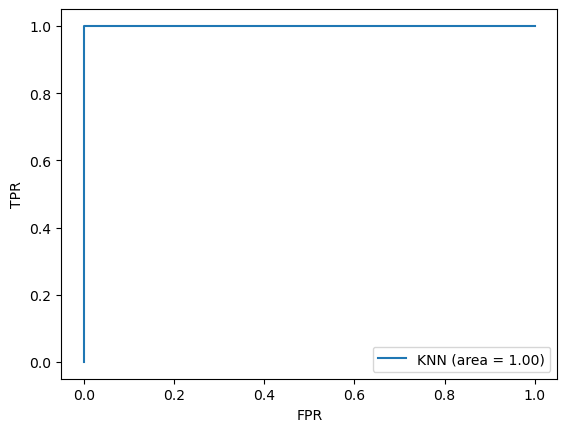

In [21]:
knn_roc_auc = roc_auc_score(y_train, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_train, knn_best_model.predict_proba(X_train)[:,1], pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##  Decision Tree

### Specifying Model

### Confusion Matrix

### ROC Curve

## Random Forest

## Boosted Tree